# Data Exploration

For this week's individual assignment, I will be exploring a [dataset of public libraries in Los Angeles](https://geohub.lacity.org/datasets/lacounty::libraries-1/about), obtained from the City of Los Angeles' GeoHub. This dataset provides information from different libraries throughout LA county such as contact phone numbers, addresses, hours, and geographic location. After importing geopandas and the data, I will conduct data exploration and document my processes along the way.

In [10]:
# import geopandas 
import geopandas as gpd

To import the data, I used gpd.read_file. I first copied the file path from the libraries.zip file but received an error. I recalled that on a mac, a file might need to be unzipped and then compressed again so I went ahead and did that, listing my second data set as Libraries_2. I still received an error message. Through trial and error, I realized that I was not using a relative path. 

In [14]:
# import library data using copy path. Received several errors and realized that the location was incorrect
library = gpd.read_file('Libraries_2.zip')

I didn't receive an error message (yay!) and successfully imported the data

I want to confirm that I have a GeoDataFrame. To confirm the type of data I'm working with, use type

In [15]:
type(library)

geopandas.geodataframe.GeoDataFrame

This tells me that I do in fact have a GeoDataFrame

I want to start off by looking at a general overview of my data. Using .head brings in the first five rows of the dataset

In [16]:
# let's look at the first 5 rows of the dataset
library.head()

,OBJECTID,source,ext_id,cat1,cat2,cat3,org_name,Name,addrln1,addrln2,...,link,use_type,latitude,longitude,email,date_updat,dis_status,POINT_X,POINT_Y,geometry
0,1834,211,None,Municipal Services,Libraries,None,www.brailleinstitute.org,Braille Institute,741 N. Vermont Ave.,None,...,http://egis3.lacounty.gov/lms/?p=1991,publish,34.084822,-118.291915,None,2013-06-01,None,6.473280e+06,1.853377e+06,POINT (-118.29192 34.08482)
1,1835,211,None,Municipal Services,Libraries,None,www.lbpl.org,Long Beach Public Library,101 Pacific Ave.,None,...,http://egis3.lacounty.gov/lms/?p=1992,publish,33.767714,-118.194311,None,2013-06-01,None,6.502611e+06,1.737903e+06,POINT (-118.19431 33.76771)
2,1843,211,None,Municipal Services,Libraries,None,libraryservices.lacoe.edu,Digital Information Reference Services,12757 Bellflower Blvd.,None,...,http://egis3.lacounty.gov/lms/?p=2002,publish,33.915696,-118.125771,None,2013-06-01,None,6.523511e+06,1.791724e+06,POINT (-118.12577 33.91570)
3,1986,211,None,Municipal Services,Libraries,None,www.worksourcecalifornia.com,Los Angeles County Community And Senior Servic...,26455 Rockwell Canyon Rd,None,...,http://egis3.lacounty.gov/lms/?p=2134,publish,34.405831,-118.573439,None,2013-06-01,None,6.388704e+06,1.970563e+06,POINT (-118.57344 34.40583)
4,2183,211,None,Municipal Services,Libraries,None,www.lbpl.org,Long Beach Public Library - North Neighborhood...,5571 Orange Ave.,None,...,http://egis3.lacounty.gov/lms/?p=2473,publish,33.857588,-118.177563,None,2013-06-01,None,6.507759e+06,1.770601e+06,POINT (-118.17756 33.85759)


I can see the first 5 rows of the dataset and some of the 30 columns of the dataset including addresses, latitudes and longitudes, however not all 30 columns are listed

In [18]:
# let's look at the very last row of the dataset
library.tail(1)

,OBJECTID,source,ext_id,cat1,cat2,cat3,org_name,Name,addrln1,addrln2,...,link,use_type,latitude,longitude,email,date_updat,dis_status,POINT_X,POINT_Y,geometry
269,71396,LA County Department of Community and Senior S...,None,Municipal Services,Libraries,None,None,Palmdale City Library,700 East Palmdale Blvd.,None,...,http://egis3.lacounty.gov/lms/?p=81145,publish,34.579165,-118.116074,pcl@cityofpalmdale.org,2016-05-02,None,6.526732e+06,2.033170e+06,POINT (-118.11607 34.57917)


This is showing me the very last line of the dataset which happens to be a library in Palmdale. 

To get all the datatypes for each column, we can use .dtypes but using .info() gives us more information

In [21]:
# let's use .info to see some info on the data
library.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    270 non-null    int64   
 1   source      270 non-null    object  
 2   ext_id      1 non-null      object  
 3   cat1        270 non-null    object  
 4   cat2        270 non-null    object  
 5   cat3        0 non-null      object  
 6   org_name    164 non-null    object  
 7   Name        270 non-null    object  
 8   addrln1     270 non-null    object  
 9   addrln2     5 non-null      object  
 10  city        270 non-null    object  
 11  state       270 non-null    object  
 12  hours       235 non-null    object  
 13  phones      269 non-null    object  
 14  url         266 non-null    object  
 15  info1       0 non-null      object  
 16  info2       0 non-null      object  
 17  post_id     270 non-null    int64   
 18  descriptio  263 non-null    object  
 19  

On the RangeIndex I see that the dataset has 270 entries. The non-null lets me know that there are some columns without any data. There are objects which lets me know a column has numbers and strings/objects; integers; float64; and geometry. 

using .shape will tell us the rows and columns of the data

In [20]:
# let's use .shape to look at the size of the data
library.shape

(270, 30)

I can see that there are 270 rows and 30 columns

When I pulled the first 5 rows of the dataset, I couldn't see all 30 columns. I want to see all the columns listed out so I will use .columns.to_list()

In [22]:
library.columns.to_list()

['OBJECTID',
 'source',
 'ext_id',
 'cat1',
 'cat2',
 'cat3',
 'org_name',
 'Name',
 'addrln1',
 'addrln2',
 'city',
 'state',
 'hours',
 'phones',
 'url',
 'info1',
 'info2',
 'post_id',
 'descriptio',
 'zip',
 'link',
 'use_type',
 'latitude',
 'longitude',
 'email',
 'date_updat',
 'dis_status',
 'POINT_X',
 'POINT_Y',
 'geometry']

All 30 columns of the library dataset are now listed. I can see that this datset has email addresses, zip codes, addresses and other info that might be useful in the future

The dataset is for all libraries in LA county and I want to see which city has the most libraries in the county. To run this information i will use .value_counts() with 'city' in brackets since I want a breakdown of the number of libraries per city

In [23]:
library['city'].value_counts()

Los Angeles      63
Long Beach       13
Pasadena         11
Santa Clarita     7
Torrance          6
                 ..
Wilmington        1
Venice            1
Northridge        1
Tarzana           1
Topanga           1
Name: city, Length: 121, dtype: int64

Running this gives me a condensed list of the number of libraries in each city in LA county. I can see 10 libraries out of a list of 121 though it seems that several cities only have one library. In reading a [stackoverflow article on this issue](https://stackoverflow.com/questions/67182821/python-valuecounts-method-display-all-results) it seems that using gpd.set_options and display.max_rows will display all rows of the dataframe. I'm leaving it in condensed form because I think a list of 121 rows would be a lot to scroll through

I know this dataset has 30 columns and I want to trim it to only show me columns I'm interested in. By using two square brackets, I can feed the dataframe a list of the only columns I want to see. 

In [25]:
# I will be using Name, city, zip, latitude, longitude, Point_x, and Point_Y
library[['Name','city','zip','latitude','longitude','POINT_X','POINT_Y']]

,Name,city,zip,latitude,longitude,POINT_X,POINT_Y
0,Braille Institute,Los Angeles,90029,34.084822,-118.291915,6.473280e+06,1.853377e+06
1,Long Beach Public Library,Long Beach,90822,33.767714,-118.194311,6.502611e+06,1.737903e+06
2,Digital Information Reference Services,Downey,90242,33.915696,-118.125771,6.523511e+06,1.791724e+06
3,Los Angeles County Community And Senior Servic...,Santa Clarita,91355,34.405831,-118.573439,6.388704e+06,1.970563e+06
4,Long Beach Public Library - North Neighborhood...,Long Beach,90805,33.857588,-118.177563,6.507759e+06,1.770601e+06
...,...,...,...,...,...,...,...
265,LA County Library - Stevenson Ranch Library,Stevenson Ranch,91381,34.389516,-118.594001,6.382467e+06,1.964662e+06
266,L A Law Library - Lancaster Branch - Lancaster...,Lancaster,93534,34.698131,-118.139522,6.519734e+06,2.076474e+06
267,Los Angeles Public Library - Silverlake Branch,Los Angeles,90039,34.100494,-118.259406,6.483138e+06,1.859053e+06
268,LA County Library - Topanga Library,Topanga,90290,34.090119,-118.604045,6.378782e+06,1.855726e+06


When I initially ran the code, I received an error stating that 'City','Zip' did not exist. When rexamining the dataset I realized that city and zip were not capitalized. I went ahead and fixed that in the code, ran it again, and was successful. Running this code gives me the data with the seven columns I wanted.

I want to create a new dataframe with just these seven columns so I will declare it as a new variable (library_edit). I will be making a copy of the original data using .copy() using the desired columns. Making a copy is best practice as it will allow me to go back to the original data set if needed

In [28]:
library_edit = library[['Name','city','zip','latitude','longitude','POINT_X','POINT_Y']].copy()

When I ran the code, I did not receive an error message which lets me know I successfully created the copy. But just to double check, I will run library_edit and see what appears

In [29]:
library_edit

,Name,city,zip,latitude,longitude,POINT_X,POINT_Y
0,Braille Institute,Los Angeles,90029,34.084822,-118.291915,6.473280e+06,1.853377e+06
1,Long Beach Public Library,Long Beach,90822,33.767714,-118.194311,6.502611e+06,1.737903e+06
2,Digital Information Reference Services,Downey,90242,33.915696,-118.125771,6.523511e+06,1.791724e+06
3,Los Angeles County Community And Senior Servic...,Santa Clarita,91355,34.405831,-118.573439,6.388704e+06,1.970563e+06
4,Long Beach Public Library - North Neighborhood...,Long Beach,90805,33.857588,-118.177563,6.507759e+06,1.770601e+06
...,...,...,...,...,...,...,...
265,LA County Library - Stevenson Ranch Library,Stevenson Ranch,91381,34.389516,-118.594001,6.382467e+06,1.964662e+06
266,L A Law Library - Lancaster Branch - Lancaster...,Lancaster,93534,34.698131,-118.139522,6.519734e+06,2.076474e+06
267,Los Angeles Public Library - Silverlake Branch,Los Angeles,90039,34.100494,-118.259406,6.483138e+06,1.859053e+06
268,LA County Library - Topanga Library,Topanga,90290,34.090119,-118.604045,6.378782e+06,1.855726e+06


The new dataframe has just the seven columns that I'm interested in and still has 270 rows

I still have 270 rows but I only want to see the libraries in the city of Los Angeles which means I have to query the data. I want to use the dataframe I just created with the seven columns so I use library_edit. In square brackets, I list the column in the dataframe that I'm looking to filter by, in this case "city". When querying the data, we use two equal signs which will not override the variable. The row I'm looking to use is Los Angeles. 

In [32]:
library_edit[library_edit.city == 'Los Angeles']

,Name,city,zip,latitude,longitude,POINT_X,POINT_Y
0,Braille Institute,Los Angeles,90029,34.084822,-118.291915,6.473280e+06,1.853377e+06
18,Black Resource Center,Los Angeles,90061,33.915800,-118.272281,6.479059e+06,1.791850e+06
31,L A Law Library,Los Angeles,90012,34.053994,-118.245715,6.487242e+06,1.842121e+06
38,One National Gay & Lesbian Archives,Los Angeles,90007,34.030906,-118.281711,6.476315e+06,1.833747e+06
56,Southern California Library For Social Studies...,Los Angeles,90044,33.984102,-118.291300,6.473360e+06,1.816723e+06
...,...,...,...,...,...,...,...
255,Los Angeles County Metropolitan Transportation...,Los Angeles,90012,34.054971,-118.233460,6.490955e+06,1.842468e+06
258,Educational Communication Inc,Los Angeles,90035,34.051972,-118.382801,6.445715e+06,1.841515e+06
259,La84 Foundation,Los Angeles,90018,34.032856,-118.312877,6.466874e+06,1.834485e+06
260,Autism Speaks,Los Angeles,90048,34.061156,-118.368036,6.450200e+06,1.844840e+06


By running this code, I trimmed my data from 270 rows to 63 rows, and now see all libraries in Los Angeles. I want to save this dataframe so I will declare it as a new variable and use .copy() to keep the edited library_edit datatframe. 

In [33]:
library_preferred = library_edit[library_edit.city == 'Los Angeles'].copy()

I did not receive an error message when I ran the code which lets me know I successfully created the new variable.

I think it would be helpful to see a visual representation of how many libraries there are per zip code in Los Angeles. By running .value_counts() I can find out! 

In [42]:
library_preferred['zip'].value_counts()

90012    4
90044    3
90043    3
90018    3
90029    2
90037    2
90039    2
90061    2
90023    2
90033    2
90026    2
90063    2
90035    2
90003    2
90001    2
90022    1
90025    1
90071    1
90006    1
90042    1
90005    1
90038    1
90011    1
90065    1
90059    1
90057    1
90045    1
90064    1
90046    1
90031    1
90019    1
90032    1
90036    1
90062    1
90016    1
90066    1
90027    1
90041    1
90004    1
90049    1
90002    1
90007    1
90048    1
Name: zip, dtype: int64

By running that code, I can see that the 90012 zip code has the most libraries in Los Angeles and that over half of the zip codes have one library. I'd like to save this information as a variable so I can then create a visual representation of it. I will assign this variable la_library_count

In [43]:
la_library_count = library_preferred['zip'].value_counts()

Now that I have this information saved as a variable, I want to convert it from a series into a dataframe. I can use the .reset_index() to do so.

In [52]:
la_library_count = la_library_count.reset_index()

In [53]:
la_library_count

,index,zip
0,90012,4
1,90044,3
2,90043,3
3,90018,3
4,90029,2
5,90037,2
6,90039,2
7,90061,2
8,90023,2
9,90033,2


By using .reset_index, I changed it from a series to a dataframe but I'll need to rename the columns since they've shifted. I can see what the current titles of each column is by using .columns.to_list()

In [54]:
la_library_count.columns.to_list()

['index', 'zip']

I see that the column titles are 'index' and 'zip'. I want to rename the columns to 'zip' and 'count' so I will use la_library_count.columns and assign them each value

In [55]:
la_library_count.columns = ['zip', 'count']

In [56]:
# I want to ensure that the column headers have updated so I am going to run la_library_count
la_library_count

,zip,count
0,90012,4
1,90044,3
2,90043,3
3,90018,3
4,90029,2
5,90037,2
6,90039,2
7,90061,2
8,90023,2
9,90033,2


I can see that the column names have updated and now I can work with my updated datatframe. I want to create a a visual representation that I think would be easy to understand. I think a bar chart would be a good way to represent this information.

Using .plot.bar() and by adding some additional arguments, I can format the information in a bar chart. I can define the x column as "zip", the y column as "count"; and title the bar chart "Number of libraries per zip code"

<AxesSubplot:title={'center':'Number of libraries per zip code'}, xlabel='zip'>

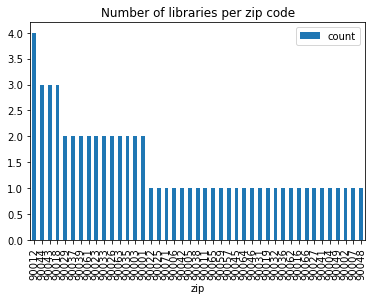

In [65]:
la_library_count.plot.bar(x = 'zip', y = 'count', title = 'Number of libraries per zip code')

By using .plot.bar and the parameters mentioned above, I can see the number of libraries each zip code has. The x-axis lists each individual zip code and the y-axis shows the count. The bar plot makes it easy to see that the majority of LA zip codes only have one library. 